In [20]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
pickleFile = './CutflowforMonojet_DM_spin-1mediator_DF.pcl'
df = pd.read_pickle(pickleFile)

In [3]:
print(df.columns)

Index(['Coupling', 'Mode', '$m_{med}$', '$m_{DM}$', '$g_{\chi}$', '$g_{q}$',
       'Data-takingperiod', 'Fullsample', 'Triggeremulation',
       '$p_{T}^{miss}>250$GeV', '$p_{T}^{miss}$qualityfilters', 'Electronveto',
       'Muonveto', 'Tauveto', 'Bjetveto', 'Photonveto',
       '"$\Delta\phi(jet_p_{T}^{miss})>0.5$rad"',
       '$\Deltap_{T}^{miss}$(PF-Calorimeter)$<0.5$rad',
       'LeadingAK4jet$p_{T}>100$GeV', 'LeadingAK4jet$\eta<2.4$',
       'LeadingAK4jetenergyfractions', 'Mono-Voverlapremoval',
       'HCALmitigation(jets)', 'HCALmitigation($\phi^{miss}$)',
       '"$\Delta\phi(\mathrm{PF}_\mathrm{Charged})<2.0$rad"'],
      dtype='object')


In [7]:
dfVectorMonoJ = df[(df['Coupling'] == 'Vector') & (df['Mode'] == '$\\chi\\chi+j$')]

In [8]:
dfVectorMonoJ

,Coupling,Mode,$m_{med}$,$m_{DM}$,$g_{\chi}$,$g_{q}$,Data-takingperiod,Fullsample,Triggeremulation,$p_{T}^{miss}>250$GeV,...,Photonveto,"""$\Delta\phi(jet_p_{T}^{miss})>0.5$rad""",$\Deltap_{T}^{miss}$(PF-Calorimeter)$<0.5$rad,LeadingAK4jet$p_{T}>100$GeV,LeadingAK4jet$\eta<2.4$,LeadingAK4jetenergyfractions,Mono-Voverlapremoval,HCALmitigation(jets),HCALmitigation($\phi^{miss}$),"""$\Delta\phi(\mathrm{PF}_\mathrm{Charged})<2.0$rad"""
18,Vector,$\chi\chi+j$,100.0,1.0,1.0,0.25,2017,1.0,0.84336,0.18074,...,0.17392,0.15822,0.15698,0.14587,0.14587,0.14459,0.13908,0.13908,0.13908,0.13900
285,Vector,$\chi\chi+j$,100.0,1.0,1.0,0.25,2018,1.0,0.82011,0.17389,...,0.16741,0.15271,0.15224,0.14344,0.14344,0.14215,0.13671,0.13059,0.11026,0.11023
28,Vector,$\chi\chi+j$,100.0,30.0,1.0,0.25,2017,1.0,0.84348,0.18037,...,0.17415,0.15827,0.15705,0.14613,0.14613,0.14476,0.13920,0.13920,0.13920,0.13917
261,Vector,$\chi\chi+j$,100.0,30.0,1.0,0.25,2018,1.0,0.81952,0.17432,...,0.16771,0.15239,0.15192,0.14363,0.14363,0.14228,0.13660,0.13052,0.11035,0.11031
75,Vector,$\chi\chi+j$,100.0,40.0,1.0,0.25,2017,1.0,0.84199,0.18031,...,0.17329,0.15739,0.15627,0.14496,0.14496,0.14365,0.13813,0.13813,0.13813,0.13808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Vector,$\chi\chi+j$,2500.0,750.0,1.0,0.25,2018,1.0,0.88265,0.46952,...,0.45315,0.42358,0.42286,0.41328,0.41328,0.41151,0.39538,0.37876,0.33240,0.33238
27,Vector,$\chi\chi+j$,2500.0,1000.0,1.0,0.25,2017,1.0,0.89986,0.47189,...,0.45495,0.42436,0.42239,0.41089,0.41089,0.40912,0.39330,0.39330,0.39330,0.39325
283,Vector,$\chi\chi+j$,2500.0,1000.0,1.0,0.25,2018,1.0,0.88086,0.46894,...,0.45239,0.42314,0.42219,0.41227,0.41227,0.41054,0.39394,0.37715,0.33213,0.33210
66,Vector,$\chi\chi+j$,2500.0,1500.0,1.0,0.25,2017,1.0,0.90250,0.48664,...,0.46882,0.43779,0.43601,0.42315,0.42315,0.42143,0.40538,0.40538,0.40538,0.40535


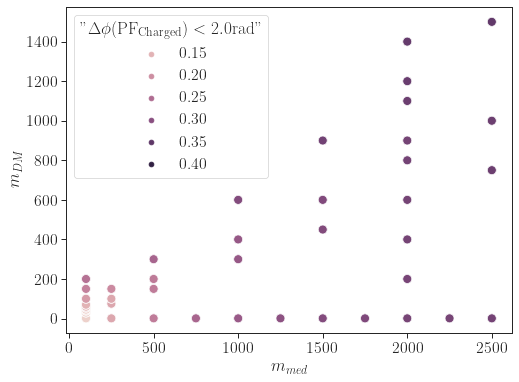

In [27]:
plt.figure(figsize=(8,6))
p =sns.scatterplot(data=dfVectorMonoJ,x='$m_{med}$', y='$m_{DM}$',
                hue='"$\Delta\phi(\mathrm{PF}_\mathrm{Charged})<2.0$rad"',s=80)
